<a href="https://colab.research.google.com/github/yeona98/ML_practice_python/blob/main/evaluation%20basic/evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Accuracy(정확도)**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




> **Dummy Classifier**


- titanic data

    여자면 생존(1), 남자면 사망(0)이라고 예측하였을 때의 Accuracy(정확도) 확인


In [2]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  # fit() 메소드는 아무것도 학습하지 않음.
  def fit(self, X, y=None):
    pass
  
  # predict() 메소드는 단순히 Sex feature가 1이면 0, 그렇지 않으면 1로 예측함.
  def predict(self, X):
    pred = np.zeros((X.shape[0], 1)) # 예측 결과를 위한 ndarray 초기화, shape[0]: feature의 개수
    for i in range(X.shape[0]) :
      if X['Sex'].iloc[i] == 1:
        pred[i] = 0
      else:
        pred[i] = 1

    return pred

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공학습
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_practice/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

# 학습 데이터/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                    test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


> **Fake Classifier**

- MNIST data

    7이면 True(1), 7이 아니면 False(0)인 imbalance한 class를 가진 dataset을 모두 0으로 예측하였을 때의 Accuracy(정확도) 확인

In [17]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
  # fit() 메소드는 아무것도 학습하지 않음.
  def fit(self, X, y):
    pass
  
  # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool) # 예측 결과를 위한 ndarray 초기화, shape[0]: feature의 개수

# 사이킷런의 내장 데이터 셋인 load_digit()를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [18]:
digits.target == 7

array([False, False, False, ..., False, False, False])

In [19]:
# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환.
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [8]:
# 불균형한 레이블 데이터 분포도 확인.
print('레이블 테스트 세트 크기: ', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

레이블 테스트 세트 크기:  (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64


In [9]:
# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

모든 예측을 0으로 하여도 정확도는:0.900


# **Confusion Matrix**

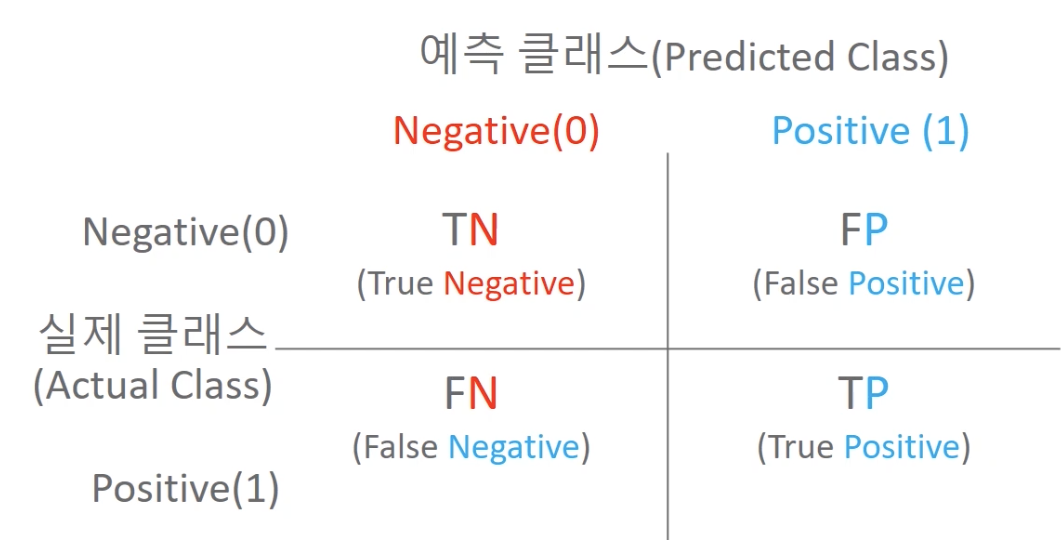

In [10]:
from sklearn.metrics import confusion_matrix

# FakeClassifier의 예측 결과인 fakepred와 실제 결과인 y_test의 confusion Matrix 출력
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

# **Precision(정밀도)와 Recall(재현율)**

**MyFakeClassifier의 예측 결과로 정밀도와 재현율 측정**

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Precision(정밀도):", precision_score(y_test, fakepred))
print("Recall(재현율):", recall_score(y_test, fakepred))

Precision(정밀도): 0.0
Recall(재현율): 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성**

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(ytest, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [32]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_practice/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

# 학습 데이터/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                    test_size=0.2, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# **Precision/Recall Trade-off**

**predict_proba() 메소드 확인**

**Binarizer 활용**

**분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 변환**

**분류 결정 임계값 0.4 기반에서 Binarizer를 이용하여 예측값 변환**

**여러 개의 분류 결정 임계값을 변경하면서 Binarizer를 이용하여 예측값 변환**

**precision_recall_curve()를 이용하여 임계값에 따른 정밀도-재현율 값 추출**

**임계값의 변경에 따른 정밀도-재현율 변화 곡선을 그림**

# **ROC Curve와 AUC**